# Credit Card Cluster Assignment
Use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data.

https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [12]:
location = "credit_card.csv"
full_df = pd.read_csv(location)
full_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [13]:
full_df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [15]:
full_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [22]:
df = full_df[['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]
df

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,40.900749,95.40,0.166667,0.083333
1,3202.467416,0.00,0.000000,0.000000
2,2495.148862,773.17,1.000000,0.000000
3,1666.670542,1499.00,0.083333,0.000000
4,817.714335,16.00,0.083333,0.000000
...,...,...,...,...
8945,28.493517,291.12,1.000000,0.833333
8946,19.183215,300.00,1.000000,0.833333
8947,23.398673,144.40,0.833333,0.666667
8948,13.457564,0.00,0.000000,0.000000


In [23]:
df["PURCHASES_FREQUENCY"].unique()

array([0.166667, 0.      , 1.      , 0.083333, 0.666667, 0.333333,
       0.25    , 0.75    , 0.5     , 0.416667, 0.916667, 0.583333,
       0.375   , 0.625   , 0.272727, 0.833333, 0.909091, 0.111111,
       0.142857, 0.090909, 0.363636, 0.1     , 0.875   , 0.125   ,
       0.818182, 0.636364, 0.2     , 0.8     , 0.3     , 0.9     ,
       0.285714, 0.727273, 0.181818, 0.7     , 0.545455, 0.888889,
       0.714286, 0.454545, 0.857143, 0.555556, 0.428571, 0.4     ,
       0.571429, 0.6     , 0.222222, 0.777778, 0.444444])

In [24]:
df["PURCHASES_INSTALLMENTS_FREQUENCY"].unique()

array([0.083333, 0.      , 0.583333, 1.      , 0.25    , 0.916667,
       0.75    , 0.5     , 0.333333, 0.666667, 0.416667, 0.166667,
       0.833333, 0.4     , 0.181818, 0.818182, 0.272727, 0.375   ,
       0.125   , 0.636364, 0.545455, 0.909091, 0.888889, 0.2     ,
       0.8     , 0.1     , 0.142857, 0.857143, 0.444444, 0.454545,
       0.111111, 0.6     , 0.555556, 0.777778, 0.3     , 0.9     ,
       0.363636, 0.714286, 0.875   , 0.222222, 0.285714, 0.7     ,
       0.727273, 0.571429, 0.090909, 0.428571, 0.625   ])

In [25]:
df.describe()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,0.490351,0.364437
std,2081.531879,2136.634782,0.401371,0.397448
min,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,0.083333,0.000000
50%,873.385231,361.280000,0.500000,0.166667
75%,2054.140036,1110.130000,0.916667,0.750000
max,19043.138560,49039.570000,1.000000,1.000000


In [27]:
colheader = {'BALANCE': 'Balance',
             'PURCHASES': 'Purchases', 
             'PURCHASES_FREQUENCY':'Purchase Freq',
             'PURCHASES_INSTALLMENTS_FREQUENCY': 'Installment Freq'}

df.rename(columns=colheader, inplace=True)
df

,Balance,Purchases,Purchase Freq,Installment Freq
0,40.900749,95.40,0.166667,0.083333
1,3202.467416,0.00,0.000000,0.000000
2,2495.148862,773.17,1.000000,0.000000
3,1666.670542,1499.00,0.083333,0.000000
4,817.714335,16.00,0.083333,0.000000
...,...,...,...,...
8945,28.493517,291.12,1.000000,0.833333
8946,19.183215,300.00,1.000000,0.833333
8947,23.398673,144.40,0.833333,0.666667
8948,13.457564,0.00,0.000000,0.000000


In [28]:
df['Purchases'].value_counts()

0.00       2044
45.65        27
150.00       16
60.00        16
100.00       13
           ... 
963.35        1
1260.13       1
203.60        1
35.97         1
169.66        1
Name: Purchases, Length: 6203, dtype: int64

In [29]:
# function to assign income groups
def balance_level(balance):
    if balance < 100:
        group = 'under $100'
    elif balance <= 1000:
        group = '$100-1000'
    elif balance <= 2000:
        group = '$1000-2000'
    elif balance > 2000:
        group = '$2000+'
        
    return group

In [32]:
df['Balance Groups'] = df['Balance'].apply(balance_level)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df

,Balance,Purchases,Purchase Freq,Installment Freq,Balance Groups
0,40.900749,95.40,0.166667,0.083333,under $100
1,3202.467416,0.00,0.000000,0.000000,$2000+
2,2495.148862,773.17,1.000000,0.000000,$2000+
3,1666.670542,1499.00,0.083333,0.000000,$1000-2000
4,817.714335,16.00,0.083333,0.000000,$100-1000
...,...,...,...,...,...
8945,28.493517,291.12,1.000000,0.833333,under $100
8946,19.183215,300.00,1.000000,0.833333,under $100
8947,23.398673,144.40,0.833333,0.666667,under $100
8948,13.457564,0.00,0.000000,0.000000,under $100


In [35]:
df.columns

Index(['Balance', 'Purchases', 'Purchase Freq', 'Installment Freq',
       'Balance Groups'],
      dtype='object')

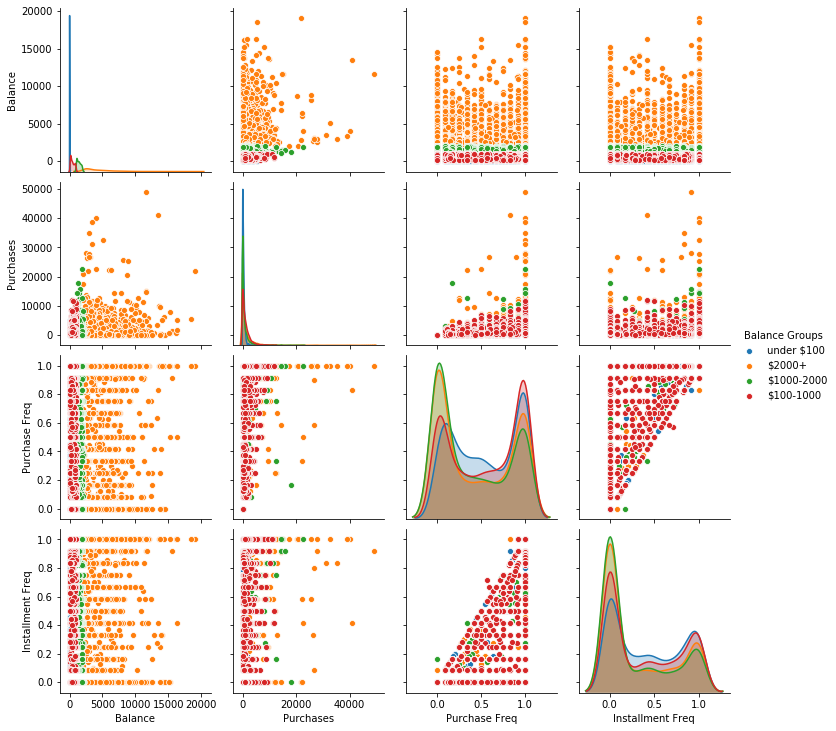

In [34]:
sns.pairplot(data=df, hue="Balance Groups")

In [36]:
df1 = df[['Purchases', 'Purchase Freq', 'Installment Freq',
       'Balance Groups']]

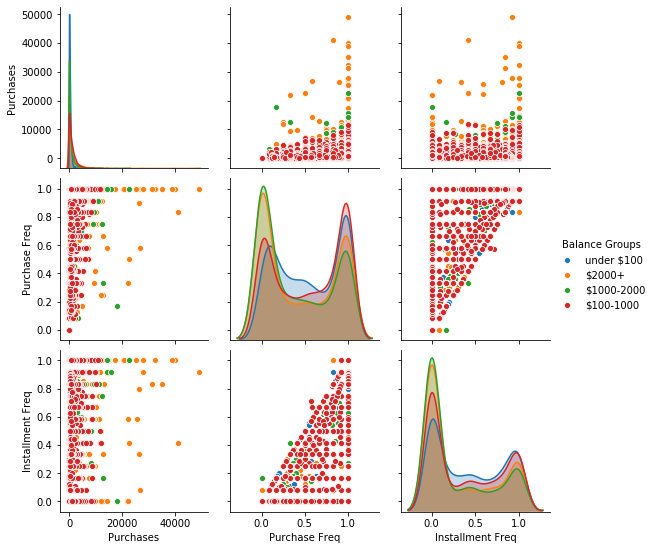

In [37]:
sns.pairplot(data=df1, hue="Balance Groups")

In [44]:
df2 = df[['Balance', 'Purchases', 'Purchase Freq', 'Installment Freq']]

In [45]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2)
kmeans.cluster_centers_

array([[2.98235185e+03, 5.86620028e+02, 3.70883274e-01, 2.56157218e-01],
       [5.30368558e+02, 6.06072926e+02, 4.94247536e-01, 3.69777687e-01],
       [2.09331237e+03, 5.83157719e+03, 9.18416245e-01, 7.13426112e-01],
       [7.32698286e+03, 1.13498607e+03, 4.25856295e-01, 3.21546685e-01],
       [5.39038957e+03, 2.76908658e+04, 8.88194417e-01, 6.96527750e-01]])

In [59]:
df2['Cluster'] = kmeans.labels_
df2.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Balance,Purchases,Installment Freq,Cluster
0,40.900749,95.40,0.083333,0
1,3202.467416,0.00,0.000000,0
2,2495.148862,773.17,0.000000,0
3,1666.670542,1499.00,0.000000,0
4,817.714335,16.00,0.000000,0


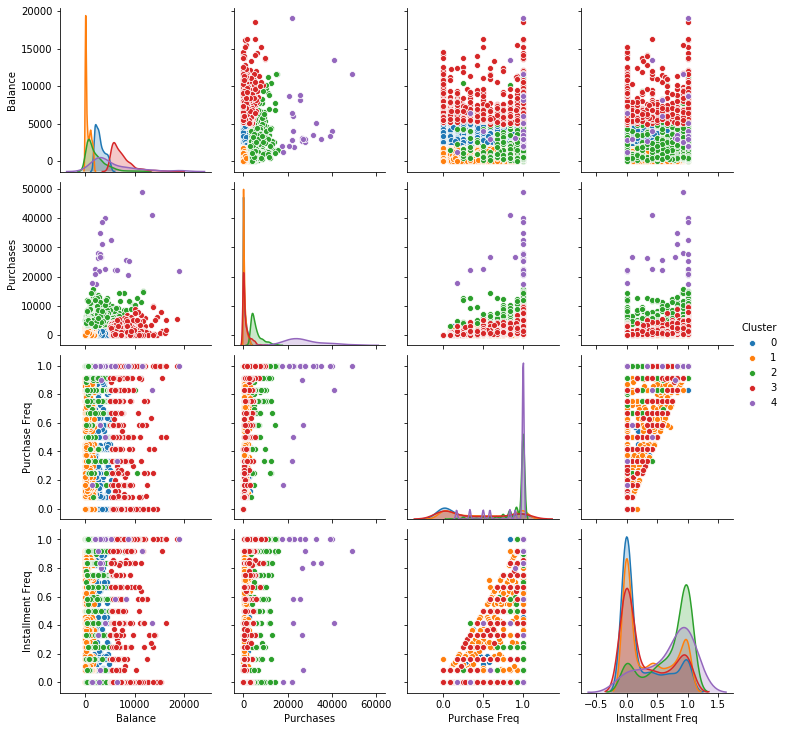

In [48]:
sns.pairplot(data=df2, hue='Cluster')

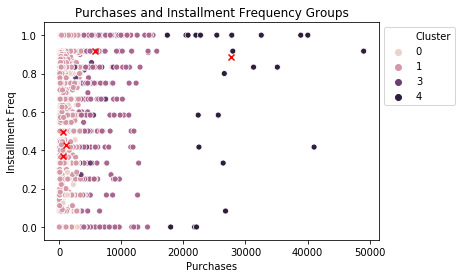

In [50]:
sns.scatterplot(data=df2, x='Purchases', y='Installment Freq', hue='Cluster')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Purchases and Installment Frequency Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

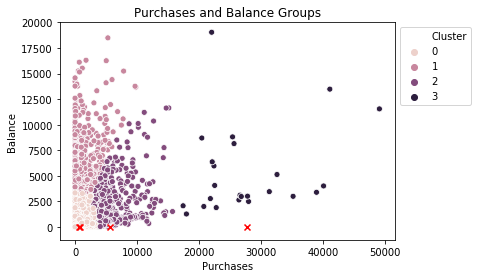

In [60]:
sns.scatterplot(data=df2, x='Purchases', y='Balance', hue='Cluster')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Purchases and Balance Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

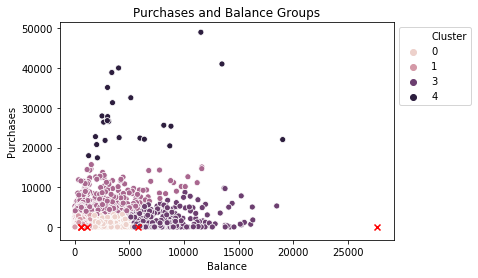

In [52]:
sns.scatterplot(data=df2, x='Balance', y='Purchases', hue='Cluster')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Balance and Purchases Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

In [54]:
df3 = df[['Balance', 'Purchases', 'Installment Freq']]

In [55]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df3)
kmeans.cluster_centers_

array([[8.33619953e+02, 5.89436339e+02, 3.48875727e-01],
       [5.76933496e+03, 8.58536216e+02, 2.90201622e-01],
       [2.14655536e+03, 5.68355875e+03, 7.18754474e-01],
       [5.39038957e+03, 2.76908658e+04, 6.96527750e-01]])

In [56]:
df3['Cluster'] = kmeans.labels_
df3.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Balance,Purchases,Installment Freq,Cluster
0,40.900749,95.40,0.083333,0
1,3202.467416,0.00,0.000000,0
2,2495.148862,773.17,0.000000,0
3,1666.670542,1499.00,0.000000,0
4,817.714335,16.00,0.000000,0


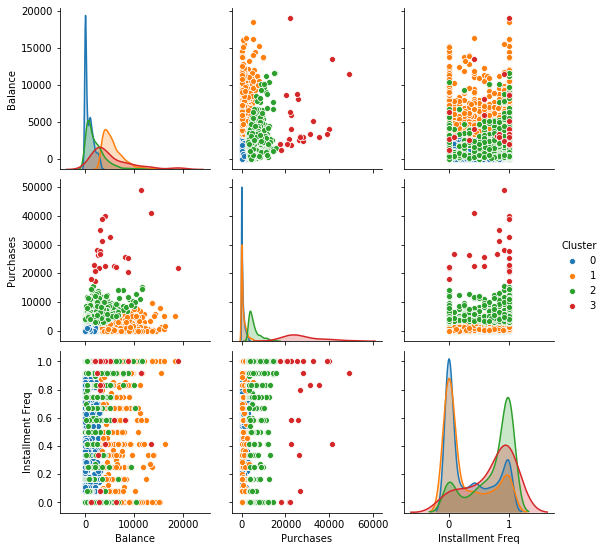

In [57]:
sns.pairplot(data=df3, hue='Cluster')

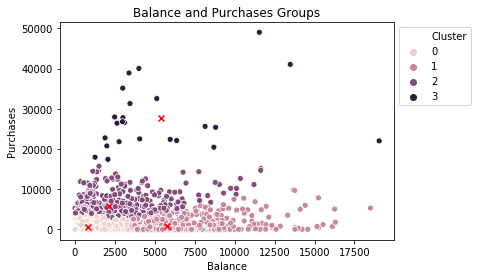

In [73]:
sns.scatterplot(data=df3, x='Balance', y='Purchases', hue='Cluster')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("Balance and Purchases Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

In [80]:
sorted_clusters = sorted(df3['Cluster'].unique())

print("Cluster Balance Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df3.loc[df3['Cluster'] == cluster_num]
    min_bal = small_df['Balance'].min()
    max_bal = small_df['Balance'].max()
    avg_purch = small_df['Purchases'].mean()
    avg_if = small_df['Installment Freq'].mean()
    
    print(f"Cluster {cluster_num}: ${min_bal}-{max_bal}, avg purchases: {int(avg_purch)}, avg installment freq: {int(avg_if)}")
    

Cluster Balance Ranges

Cluster 0: $0.0-3335.053583, avg purchases: 589, avg installment freq: 0
Cluster 1: $3255.151368-18495.55855, avg purchases: 858, avg installment freq: 0
Cluster 2: $12.659908999999999-11642.60156, avg purchases: 5678, avg installment freq: 0
Cluster 3: $1268.809031-19043.13856, avg purchases: 27690, avg installment freq: 0
